# Intro To Deep Learning

## Introduction
We will be training a convolutional neural network on the CIFAR10 dataset. This homework will guide you through loading and preprocessing data, and training and evaluating a model.


We will be building the all-cnn-c model described in the research paper attached here. The model will perform convolutions on the input images to predict one of 10 image classes.

## Dataset
The dataset can be loaded using numpy. The dataset contains 32x32 RGB images. Each file in the dataset contains 10,000 images in a 1000x3072 array. If you reshape the data to 10000x3x32x32, the dimensions are (images, channels, rows, columns). The pixel values are 0-255 unsigned bytes.

Download the data from https://www.cs.toronto.edu/~kriz/cifar.html

## Preprocessing (40 points)
The first part of this assignment is to write functions to load and preprocess the CIFAR10 data.

For further pre-processing of the data create functions for 

<li>sample_zero_mean: subtract sample-wise mean from data
<li>gcn: global contrast normalization (divide by sample-wise standard deviation)
<li>feature_zero_mean: subtract feature-wise mean from data
<li>zca: whiten data using ZCA transformation
<li>cifar_10_preprocess: chain all of the previous functions to process a dataset

## Building an All-Convolutional Neural Network (30 points)

Build an All-Convolutional Neural Network (ALL-CNN-C) as described in the referenced paper using the hyperparameters described therein. Implement the following functions:

<li> flatten_module: create a custom module that reshapes data as described in the template
<li> all_cnn_module: create a sequential module containing all 23 layers described in the All-CNN-C Model and the template file

You will create a model that takes as input (samples, 3, 32,32) and produces outputs (samples, 10) that are the unnormalized pre-softmax activations.


## Training the Model (25 points)
Now that you have preprocessed the data and correctly built a model, it is time to train. Parameters described in the paper:

stochastic gradient descent with momentum of 0:9
L2 regularization of 0.001 on all weights

Train your model You should see 70% accuracy within minutes. This vanilla model (no augmentation, smoothing, etc.) should achieve around 90% accuracy.

Write your predictions on the test set in order. You will receive credit for reaching at least 70% accuracy.

## CIFAR-10 Convolutional Neural Network
Implementation of two models in Keras for the classification of the CIFAR-10 dataset.

## First model

It's a simple model with three Convolution+Max Pooling+Dropuout layers and two fully-connected layers. It has a validation accuracy of 78%.

## Second model

The second model uses augmentation and three different types of normalization:

<li>Batch normalization
<li>Kernel regularization
<li>Dropout


## Future statement definition

__future__ is a real module, and serves three purposes:

<li> To avoid confusing existing tools that analyze import statements and expect to find the modules they’re importing.

<li> To ensure that future statements run under releases prior to 2.1 at least yield runtime exceptions (the import of __future__ will fail, because there was no module of that name prior to 2.1).

<li> To document when incompatible changes were introduced, and when they will be — or were — made mandatory. This is a form of executable documentation, and can be inspected programmatically via importing __future__ and examining its contents.



## Keras

Keras is the high-level API of TensorFlow 2: an approachable, highly-productive interface for solving machine learning problems, with a focus on modern deep learning. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity.

Keras empowers engineers and researchers to take full advantage of the scalability and cross-platform capabilities of TensorFlow 2: you can run Keras on TPU or on large clusters of GPUs, and you can export your Keras models to run in the browser or on a mobile device.

In [2]:
from __future__ import print_function      # __future__ statement definition
import keras as k                          # deep learning API written in Python, runnin
import os
import numpy as np


# Libraries from Keras

from keras.preprocessing import image      # Set of tools for real-time data augmentation on image data.
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping  # In Keras, we can implement early stopping as a callback function.
                                           #  Callbacks are functions that can be applied at certain stages of the training process, such as at the end of each epoch.
from google.colab import files

## tf.keras.utils.to_categorical

Converts a class vector (integers) to binary class matrix.

#### Arguments
(y) : class vector to be converted into a matrix (integers from 0 to num_classes).

#### num_classes
total number of classes. If None, this would be inferred as the (largest number in y) + 1.

#### dtype
The data type expected by the input. Default: 'float32'.
#### Returns
A binary matrix representation of the input. The classes axis is placed last.


## tf.keras.datasets.cifar10.load_data

Loads [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks


In [3]:
from keras.utils import to_categorical
from keras.datasets import cifar10

### Setting up the Hyperparameters

In [4]:
batch_size = 128
num_classes = 10
epochs = 100

## Separating the Training and Testing Data

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols, channels = 32,32,3

x_train = x_train.reshape(x_train.shape[0] , img_rows, img_cols, channels) 
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)

In [6]:
input_shape = (img_rows, img_cols ,1 )                # setting the size of tensor to (32,32,1)
print('Shape of X_Train Dataset:', x_train.shape)     # shape of the Training Dataset
print(x_train.shape[0],"Number of Training Samples")
print(x_test.shape[0], "Number of Test Samples")


x_train = x_train.astype('float32')                   #  astype() function provides the capability to convert
x_test = x_test.astype('float32')                     #  any suitable existing column to categorical type.

mean = np.mean(x_train)                               # Mean of the Training Dataset
std = np.std(x_train)                                 # Standard Deviation of the Training Dataset

x_test = (x_test - mean)/std                          # normalizing 
x_train = (x_train - mean)/std

y_train = k.utils.to_categorical(y_train, num_classes)
y_test = k.utils.to_categorical(y_test, num_classes)

Shape of X_Train Dataset: (50000, 32, 32, 3)
50000 Number of Training Samples
10000 Number of Test Samples


In [35]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib




## Migrating from tensorflow 1 to tensorflow 2

Since tensorflow has updated, many function and commands that we used in Tensorflow1 has been rendered useless.

For Eg: tf.Session , tf.ConfigProto


#### There are two ways to resolve these:

<li> ConfigProto disappeared in tf 2.0, so an elegant solution is:

import tensorflow as tf

and then replace:

tf.ConfigProto by tf.compat.v1.ConfigProto

In fact, the compatibility built in 2.0 to get tf 1.XX: tf.compat.v1 is really helpful.



<li> This is an easy one and works!

If you don't want to touch your code, just add these 2 lines in the main.py file w/ Tensorflow code:

import tensorflow.compat.v1 as tf \\
tf.disable_v2_behavior()



Check about it more [here](https://www.tensorflow.org/guide/migrate)

In [21]:
# Checking for GPU in Tensorflow Backend

import tensorflow.compat.v1 as tf                    # tensorflow1 migrated to tensorflow2
tf.disable_v2_behavior()                             # hence this statement to help me run the tf1 commands
from keras import backend as K                       # importing the tf.keras backend
from tensorflow.python.client import device_lib
#import tensorflow as tf

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print(device_lib.list_local_devices())
#K.tensorflow_backend._get_available_gpus()

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14931426777980401989
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14674281152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11843404702873996523
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


## The Sequential model

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

A Sequential model is not appropriate when:

<li>Your model has multiple inputs or multiple outputs
<li>Any of your layers has multiple inputs or multiple outputs
<li>You need to do layer sharing
<li> You want non-linear topology (e.g. a residual connection, a multi-branch model)


## Dense
$\textbf{tf.keras.layers.Dense}$ \\
Just your regular densely-connected NN layer.
Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

Besides, layer attributes cannot be modified after the layer has been called once (except the trainable attribute).

#### Input shape:
N-D tensor with shape: (batch_size, ..., input_dim). The most common situation would be a 2D input with shape (batch_size, input_dim).

##### Output shape:
N-D tensor with shape: (batch_size, ..., units). For instance, for a 2D input with shape (batch_size, input_dim), the output would have shape (batch_size, units).




## Dropout

$\textbf{tf.keras.layers.Dropout}$

Applies Dropout to the input.
The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference. When using model.fit, training will be appropriately set to True automatically, and in other contexts, you can set the kwarg explicitly to True when calling the layer.

(This is in contrast to setting trainable=False for a Dropout layer. trainable does not affect the layer's behavior, as Dropout does not have any variables/weights that can be frozen during training.)



## Flatten

$\textbf{tf.keras.layers.Flatten}$

Flattens the input. Does not affect the batch size.


## Activation

$\textbf{tf.keras.layers.Activation}$

Applies an activation function to an output.

## BatchNormalization

$\textbf{tf.keras.layers.BatchNormalization}$

The layer will transform inputs so that they are standardized, meaning that they will have a mean of zero and a standard deviation of one.

During training, the layer will keep track of statistics for each input variable and use them to standardize the data.

Further, the standardized output can be scaled using the learned parameters of Beta and Gamma that define the new mean and standard deviation for the output of the transform. The layer can be configured to control whether these additional parameters will be used or not via the “center” and “scale” attributes respectively. By default, they are enabled.

The statistics used to perform the standardization, e.g. the mean and standard deviation of each variable, are updated for each mini batch and a running average is maintained

## Conv2D layer

2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last".

Learn [More](https://keras.io/api/layers/convolution_layers/convolution2d/)





## MaxPooling2D layer

Max pooling operation for 2D spatial data.

Downsamples the input representation by taking the maximum value over the window defined by pool_size for each dimension along the features axis. The window is shifted by strides in each dimension. The resulting output when using "valid" padding option has a shape(number of rows or columns) of: output_shape = (input_shape - pool_size + 1) / strides)

The resulting output shape when using the "same" padding option is: output_shape = input_shape / strides

## Optimizer

### Adadelta

Adadelta is a more robust extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate based on a fixed moving window of gradient updates, instead of accumulating all past gradients.

Adadelta functions as a stochastic gradient descent-method. It has a float known as the Adadelta decay factor (p).


##### $\textbf{Learning Rate}$


The learning rate is controlling the size of the update steps along the gradient. This parameter sets how much of the gradient you update with, where 1 = 100% but normally you set much smaller learning rate, e.g., 0.001.
Choosing a good learning rate is important when training a neural network. If the ball rolls carefully with a small learning rate we can expect to make consistent but very small progress (this corresponds to having a small learning rate). The risk though is that the ball gets stuck in a local minima not reaching the global minima.


##### $\textbf{p}$

p (epsilon) is called fuzz or decay factor.



In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3), input_shape=x_train.shape[1:], activation ="relu"))    # adding Convulational layers to the neural network
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3, 3), input_shape=x_train.shape[1:], activation ="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(3, 3), input_shape=x_train.shape[1:], activation ="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

opt = k.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)          # Optimizer that implements the Adadelta algorithm.
model.compile(loss='categorical_crossentropy',                                  # compiling the entire model
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         7

In [17]:
tf.config.list_physical_devices('GPU')             # checking for GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [18]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [19]:
tf.test.is_built_with_cuda() #  Use tf.test.is_built_with_cuda to validate if TensorFlow was build with CUDA support.

True

## Visualize your model with TensorFlow 2 and Keras

The built-in plot_model facility within Keras. It allows you to create a visualization of your model architecture.

From the Keras utilities, one needs to import the function, after which it can be used with very minimal parameters:

<li>The model instance, or the model that you created – whether you created it now or preloaded it instead from a model saved to disk.
<li>And the to_file parameter, which essentially specifies a location on disk where the model visualization is stored.


#### If you wish, you can supply some additional parameters as well:

<li>The show_shapes argument (which is False by default) which controls whether the shape of the layer outputs are shown in the graph. This would be beneficial if besides the architecture you also need to understand how it transforms data.
<li> With show_dtypes (False by default) you can indicate whether to show layer data types on the plot.
<li> The show_layer_names argument (True by default) which determines whether the names of the layers are displayed.
<li>The rankdir (TB by default) can be used to indicate whether you want a vertical or horizontal plot. TB is vertical, LR is horizontal.
<li> The expand_nested (False by default) controls how nested models are displayed.
<li> Dpi controls the dpi value of the image.

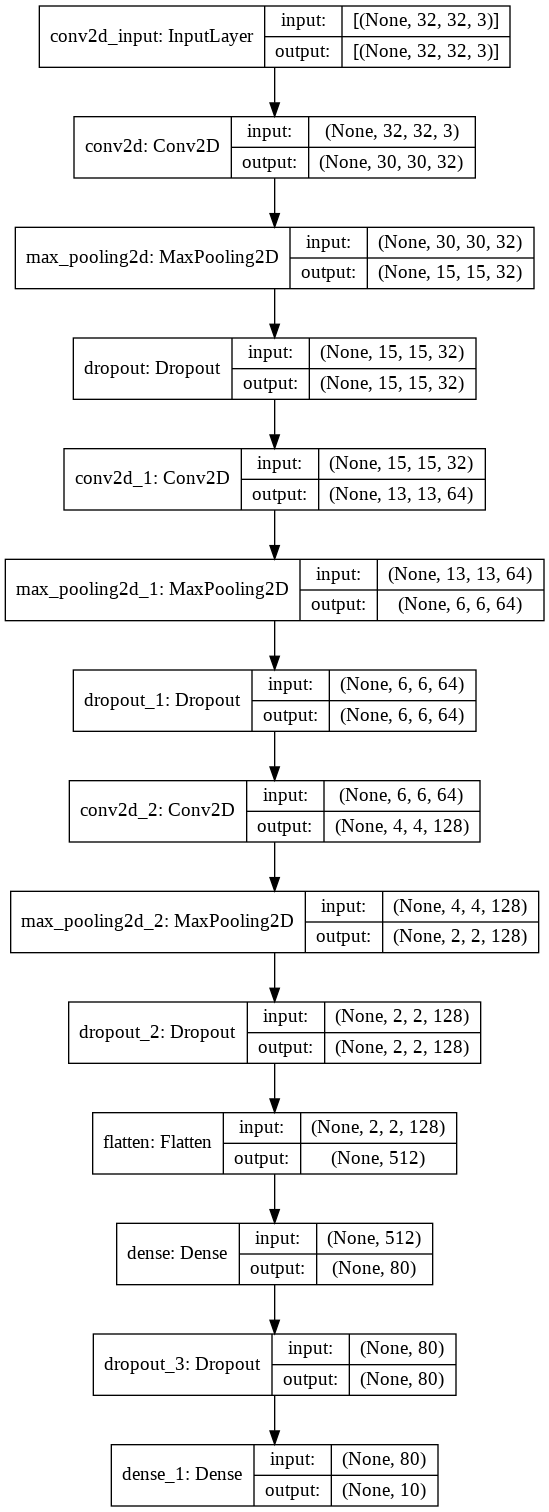

In [23]:

from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [24]:
# fitting our model on the training data
with tf.device('/device:GPU:0'):
  history = model.fit(x_train, y_train,
              batch_size=batch_size,           # setting up the hyperparameters
              epochs=epochs,                   # epochs are 100
              validation_split=0.2,
              shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - ETA: 0s - loss: 1.8729 - acc: 0.3114

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


40000/40000 [==============================] - 35s 875us/sample - loss: 1.8729 - acc: 0.3114 - val_loss: 1.6086 - val_acc: 0.4356
Epoch 2/100
40000/40000 [==============================] - 3s 67us/sample - loss: 1.5211 - acc: 0.4484 - val_loss: 1.3461 - val_acc: 0.5245
Epoch 3/100
40000/40000 [==============================] - 3s 65us/sample - loss: 1.3501 - acc: 0.5137 - val_loss: 1.2050 - val_acc: 0.5763
Epoch 4/100
40000/40000 [==============================] - 3s 66us/sample - loss: 1.2623 - acc: 0.5513 - val_loss: 1.1401 - val_acc: 0.6204
Epoch 5/100
40000/40000 [==============================] - 3s 67us/sample - loss: 1.1950 - acc: 0.5770 - val_loss: 1.0716 - val_acc: 0.6280
Epoch 6/100
40000/40000 [==============================] - 3s 67us/sample - loss: 1.1463 - acc: 0.5956 - val_loss: 1.0330 - val_acc: 0.6414
Epoch 7/100
40000/40000 [==============================] - 3s 66us/sample - loss: 1.0983 - acc: 0.6138 - val_loss: 0.9733 - val_acc: 0.6633
Epoch 8/100
40000/40000 [=====

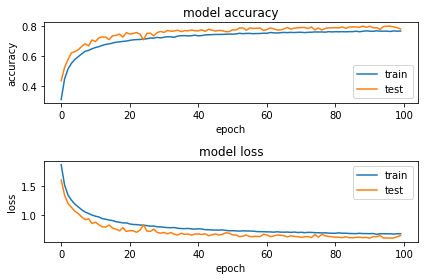

In [25]:
save_dir = "./"                                           # place where our model will be saved, it will save on the google colab notebook
model_name = 'keras_cifar.h5'                             # name of our model
model_path = os.path.join(save_dir, model_name)           # setting up the path for our model
model.save(model_path)

# plotting the metrics

# plotting the Accuracy of our model
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


# plotting the loss function
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


plt.tight_layout()

In [26]:
# Evaluating our Model


scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.672978377532959
Test accuracy: 0.7721


The Test Loss is 0.67 and the accuracy with which our model predicts the coreect data is 77%

## Utils

Label encoding them. \\
np_utils.to_categorical is used to convert array of labeled data(from 0 to nb_classes - 1) to one-hot vector. 

In [27]:
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = cifar10.load_data()      # loading the CIFAR10 dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))                         # mean of the training data
std = np.std(x_train,axis=(0,1,2,3))                           # Standard deviation of the training data
x_train = (x_train-mean)/(std+1e-7)                            # normalizing our data (both training and test)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

### Learning Rate

The function below will take the epochs as the argument, checks whether the number of epochs are greater than the number , and sets a different learning rate for a different range of Epochs

In [28]:
def lr_schedule(epoch):     # take epochs as an argument
    lrate = 0.001           # initialize the learning rate to be 0.001
    if epoch > 75:          # checks when the epochs go above 75
        lrate = 0.0005      # changes the learning rate to 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate            # returns the learning rate

## Image Data Generator

Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize. Image data augmentation is supported in the Keras deep learning library via the ImageDataGenerator class.

$\textbf{tf.keras.preprocessing.image.ImageDataGener}$

Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).

In [29]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
#    zoom_range=0.3
    )
datagen.fit(x_train)

## Training the Second model from our understanding of the first Model

In [31]:
from keras import regularizers
from keras.callbacks import LearningRateScheduler
weight_decay = 1e-4
model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model2.add(Activation('elu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
 
model2.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.3))
 
model2.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.4))
 
model2.add(Flatten())
model2.add(Dense(num_classes, activation='softmax'))
 
model2.summary()
 
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
#training
batch_size = 64

from tensorflow.keras import optimizers
 
opt_rms = optimizers.RMSprop(lr=0.001,decay=1e-6)
model2.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
history2 = model2.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)       

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1240: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/125
780/781 [============================>.] - ETA: 0s - batch: 389.5000 - size: 63.9385 - loss: 1.8876 - acc: 0.4276

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


781/781 [==============================] - 29s 35ms/step - batch: 390.0000 - size: 63.9385 - loss: 1.8870 - acc: 0.4277 - val_loss: 1.2631 - val_acc: 0.5996
Epoch 2/125
781/781 [==============================] - 27s 35ms/step - batch: 390.0000 - size: 63.9385 - loss: 1.2578 - acc: 0.5913 - val_loss: 1.0657 - val_acc: 0.6677
Epoch 3/125
781/781 [==============================] - 27s 35ms/step - batch: 390.0000 - size: 63.9385 - loss: 1.0672 - acc: 0.6577 - val_loss: 0.9381 - val_acc: 0.7062
Epoch 4/125
781/781 [==============================] - 27s 35ms/step - batch: 390.0000 - size: 63.9385 - loss: 0.9628 - acc: 0.6957 - val_loss: 0.9435 - val_acc: 0.7268
Epoch 5/125
781/781 [==============================] - 27s 35ms/step - batch: 390.0000 - size: 63.9385 - loss: 0.8995 - acc: 0.7210 - val_loss: 0.7934 - val_acc: 0.7611
Epoch 6/125
781/781 [==============================] - 28s 35ms/step - batch: 390.0000 - size: 63.9385 - loss: 0.8555 - acc: 0.7385 - val_loss: 0.8145 - val_acc: 0.762

### Plotting the Image of our second and improved Model

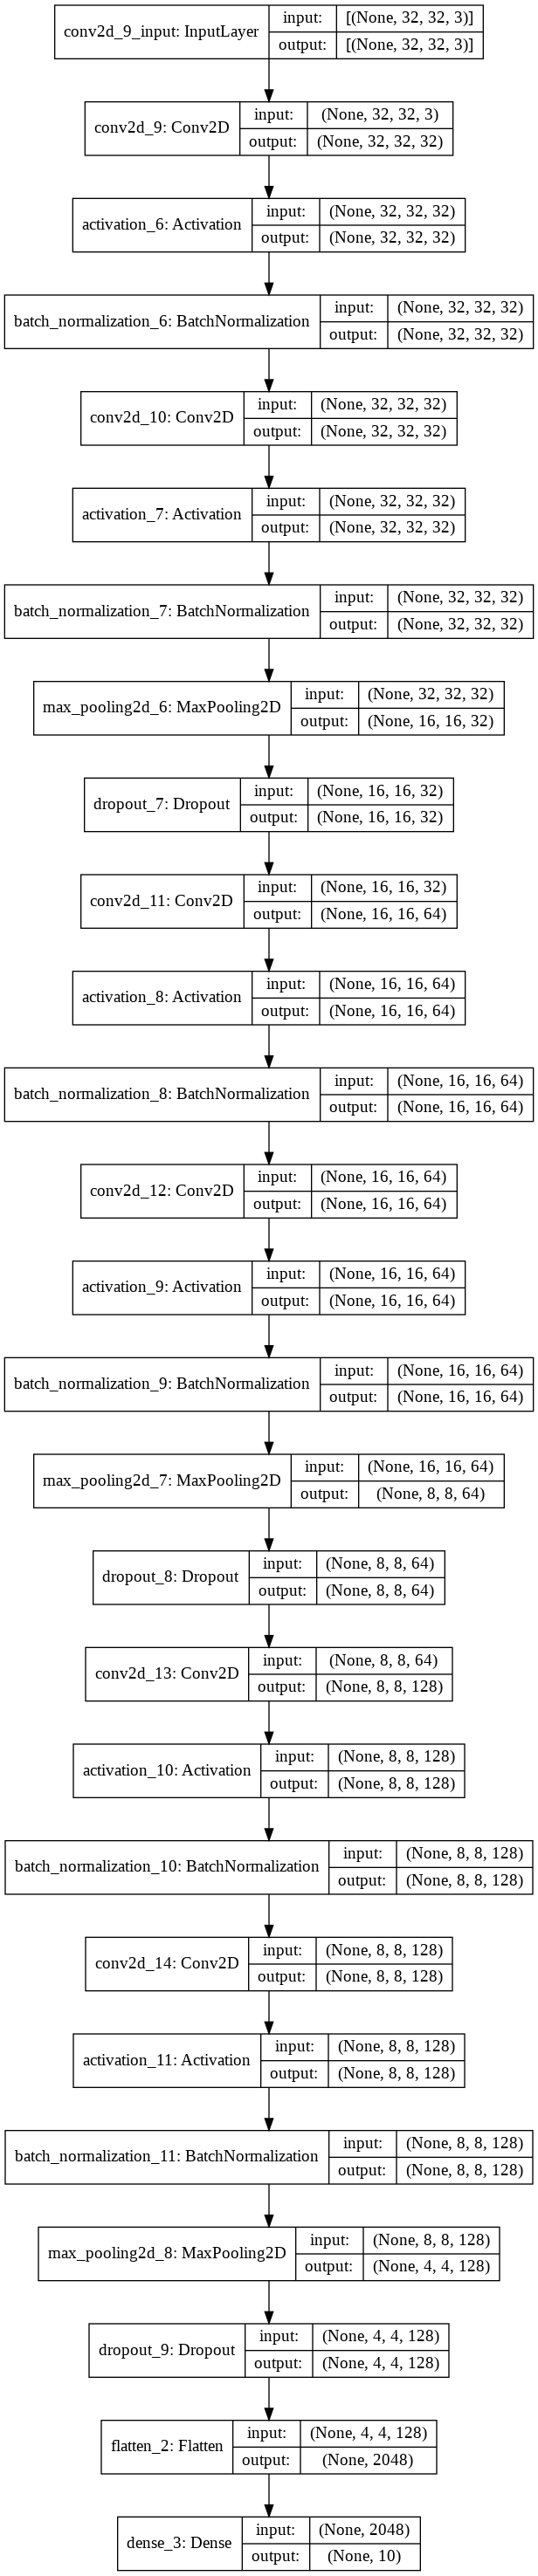

In [32]:
plot_model(model2, show_shapes=True, show_layer_names=True, to_file='model2.png')
from IPython.display import Image
Image(retina=True, filename='model2.png')

## Saving and Plotting

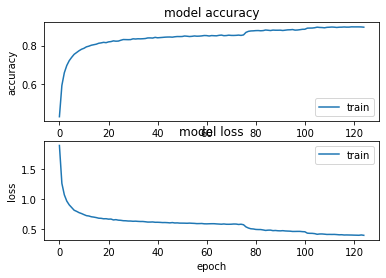

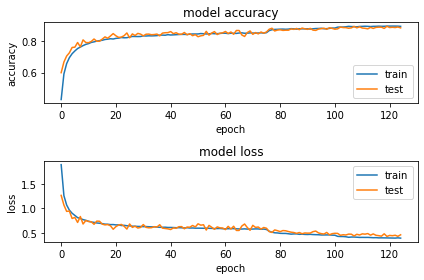

In [33]:
save_dir = "./"                                            # saving the model on google colab
model_name = 'keras_cifar2.h5'                             # naming our model
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

# plotting the metrics


fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history2.history['acc'])
#plt.plot(history2.history['val_acc'])                    # plotting the model accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history2.history['loss'])
#plt.plot(history2.history['val_loss'])
plt.title('model loss')                                 # plotting the model loss
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


plt.tight_layout()

In [34]:
# How well does our second model works
scores2 = model2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores2[0])
print('Test accuracy:', scores2[1])

Test loss: 0.4605232014656067
Test accuracy: 0.8864


So we were able to Improve our accuracy from 78% to 88%